In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# First we will read the clean data
features = pd.read_csv(r"X_train_filtered.csv")
df_labels = pd.read_csv(r"y_train.csv")

For data exploration we will:

- Find the top 10 words have the most influence, which also means top 10 words that have the highest weight, to each of the topic: business, entertainment, politics, tech and finally sport.
- We also plot those words to a bar chart for each of the toic in order to visualize them easily.
- The final step is that we will find the label distribution of the training set so that we can calculate the ratio between the highest label and the lowest one to figure out which models suit best our training set.

In [16]:
# Top 10 words that have the most influence to the topic "Business"

business_indices = df_labels[df_labels['topic'] == 'business'].index
business_words_mean = features.iloc[business_indices].mean().sort_values(ascending=False).head(10)
print(business_words_mean)

company     0.042138
growth      0.040956
economy     0.037835
year        0.037397
market      0.037326
firm        0.037081
bank        0.036892
oil         0.032006
economic    0.030674
stock       0.024790
dtype: float64


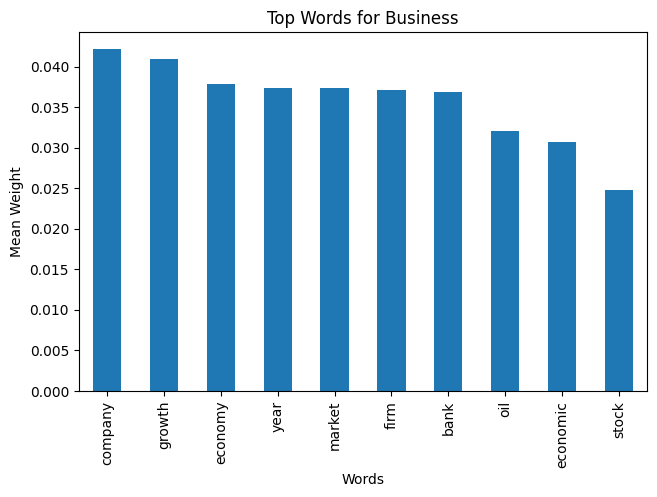

In [56]:
# Plot the top 10 words of "Business" topic as bar chart

business_words_mean.plot(kind='bar', title='Top Words for Business')

plt.xlabel('Words')
plt.ylabel('Mean Weight')
plt.tight_layout(pad=0.1) 
plt.savefig("business_words.png")
plt.show()

In [18]:
# Top 10 words that have the most influence to the topic "Entertainment"

entertainment_indices = df_labels[df_labels['topic'] == 'entertainment'].index
entertainment_words_mean = features.iloc[entertainment_indices].mean().sort_values(ascending=False).head(10)
print(entertainment_words_mean)

film        0.094129
music       0.049964
band        0.036150
award       0.035187
album       0.030871
festival    0.029920
year        0.028984
star        0.028829
actor       0.028195
singer      0.026916
dtype: float64


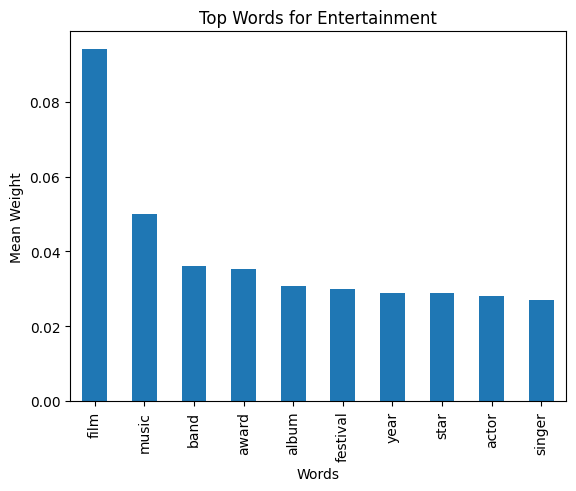

In [19]:
# Plot the top 10 words of "Entertainment" topic as bar chart

entertainment_words_mean.plot(kind='bar', title='Top Words for Entertainment')
plt.xlabel('Words')
plt.ylabel('Mean Weight')
plt.show()

In [20]:
# Top 10 words that have the most influence to the topic "Politics"

politics_indices = df_labels[df_labels['topic'] == 'politics'].index
politics_words_mean = features.iloc[politics_indices].mean().sort_values(ascending=False).head(10)
print(politics_words_mean)

labour        0.076400
blair         0.063656
election      0.062310
party         0.059212
government    0.058737
brown         0.041988
minister      0.040409
people        0.037091
tory          0.032516
prime         0.031576
dtype: float64


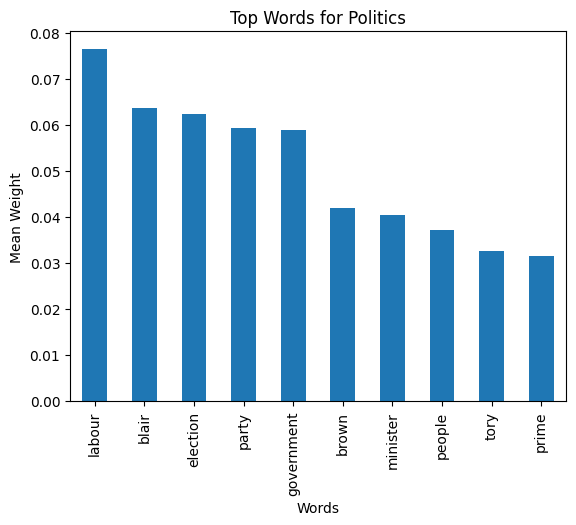

In [21]:
# Plot the top 10 words of "Politics" topic as bar chart

politics_words_mean.plot(kind='bar', title='Top Words for Politics')
plt.xlabel('Words')
plt.ylabel('Mean Weight')
plt.show()

In [22]:
# Top 10 words that have the most influence to the topic "Tech"

tech_indices = df_labels[df_labels['topic'] == 'tech'].index
tech_words_mean = features.iloc[tech_indices].mean().sort_values(ascending=False).head(10)
print(tech_words_mean)

people        0.064287
mobile        0.052731
technology    0.047879
net           0.040259
digital       0.039433
phone         0.038021
music         0.037522
search        0.031672
video         0.031402
game          0.030100
dtype: float64


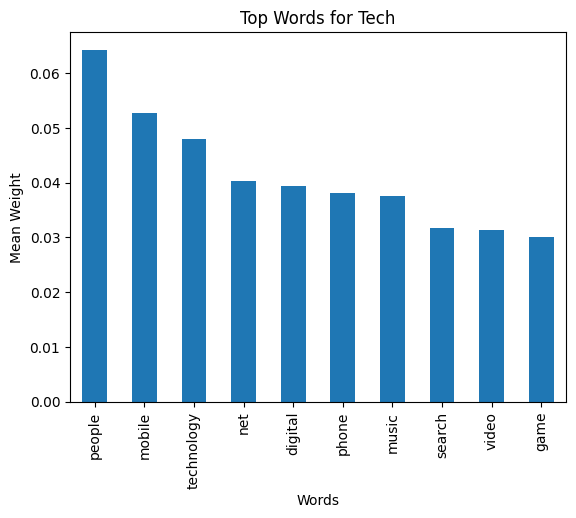

In [23]:
# Plot the top 10 words of "Tech" topic as bar chart

tech_words_mean.plot(kind='bar', title='Top Words for Tech')
plt.xlabel('Words')
plt.ylabel('Mean Weight')
plt.show()


In [24]:
# Top 10 words that have the most influence to the topic "Sport"

sport_indices = df_labels[df_labels['topic'] == 'sport'].index
sport_words_mean = features.iloc[sport_indices].mean().sort_values(ascending=False).head(10)
print(sport_words_mean)

game      0.051037
win       0.045445
cup       0.040831
match     0.037272
play      0.034562
club      0.034395
injury    0.033279
team      0.032860
coach     0.032797
season    0.032341
dtype: float64


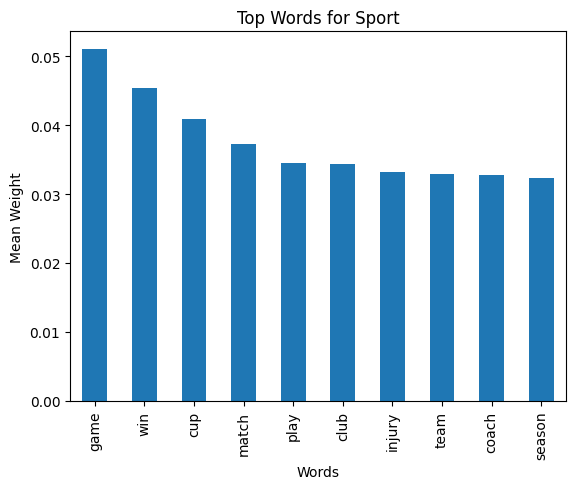

In [25]:
# Plot the top 10 words of "Sport" topic as bar chart

sport_words_mean.plot(kind='bar', title='Top Words for Sport')
plt.xlabel('Words')
plt.ylabel('Mean Weight')
plt.show()

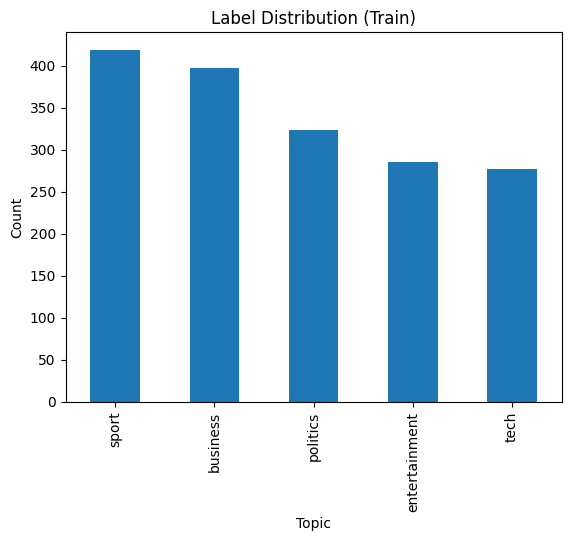

topic
sport            419
business         397
politics         323
entertainment    285
tech             277
Name: count, dtype: int64


In [26]:
import matplotlib.pyplot as plt

# Draw the bar chart to check the labels distribution
df_labels['topic'].value_counts().plot(kind='bar', title='Label Distribution (Train)', xlabel='Topic', ylabel='Count')
plt.show()

# The number of time that each label appears in the training set
print(df_labels['topic'].value_counts())

If the largest class has more than 1.5 times the size of the smallest class -> Imbalanced Dataset

Since 

+The largest class is sport which has the value of 419

+The smallest class is tech which has the value of 277

We can calculate the ratio: sport / tech = 419 / 277 = 1.51 (approximately)
-> The dataset is quite imbalanced. Therefore, we decided to user RandomForrest as our model in this situaion. Furthermore, we also tried to use SVC to see if there are any differences between the 2 models.